In [1]:
import pandas as pd
import numpy as np

In [3]:
app_record = pd.read_csv('../data/application_record.csv')
cred_record = pd.read_csv('../data/credit_record.csv')

In [33]:
print(len(app_record))
print(len(cred_record))

438557
1048575


In [5]:
app_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [8]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [31]:
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [11]:
app_record['CODE_GENDER'].value_counts

<bound method IndexOpsMixin.value_counts of 0         M
1         M
2         M
3         F
4         F
         ..
438552    M
438553    F
438554    F
438555    F
438556    F
Name: CODE_GENDER, Length: 438557, dtype: object>

In [12]:
app_record['FLAG_OWN_CAR'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Y
1         Y
2         Y
3         N
4         N
         ..
438552    N
438553    N
438554    N
438555    N
438556    N
Name: FLAG_OWN_CAR, Length: 438557, dtype: object>

In [13]:
app_record['FLAG_OWN_REALTY'].values

array(['Y', 'Y', 'Y', ..., 'N', 'Y', 'Y'], dtype=object)

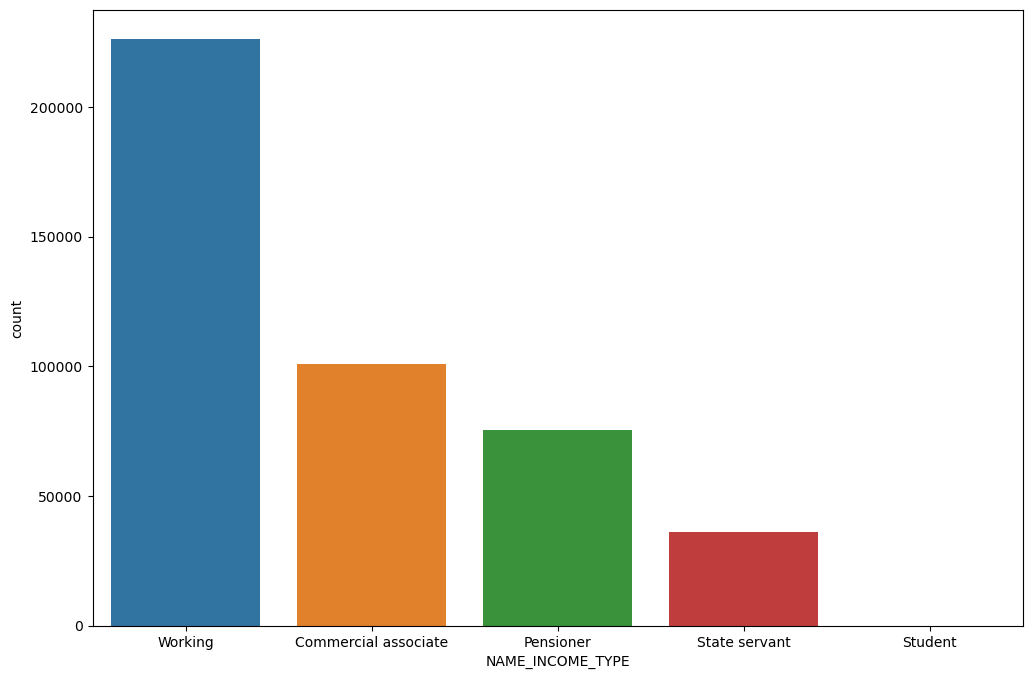

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_INCOME_TYPE', data=app_record)
plt.show()

In [19]:
len(app_record[app_record['NAME_INCOME_TYPE'] == 'Student'])

17

In [20]:
app_record['NAME_EDUCATION_TYPE'].values

array(['Higher education', 'Higher education',
       'Secondary / secondary special', ..., 'Higher education',
       'Secondary / secondary special', 'Secondary / secondary special'],
      dtype=object)

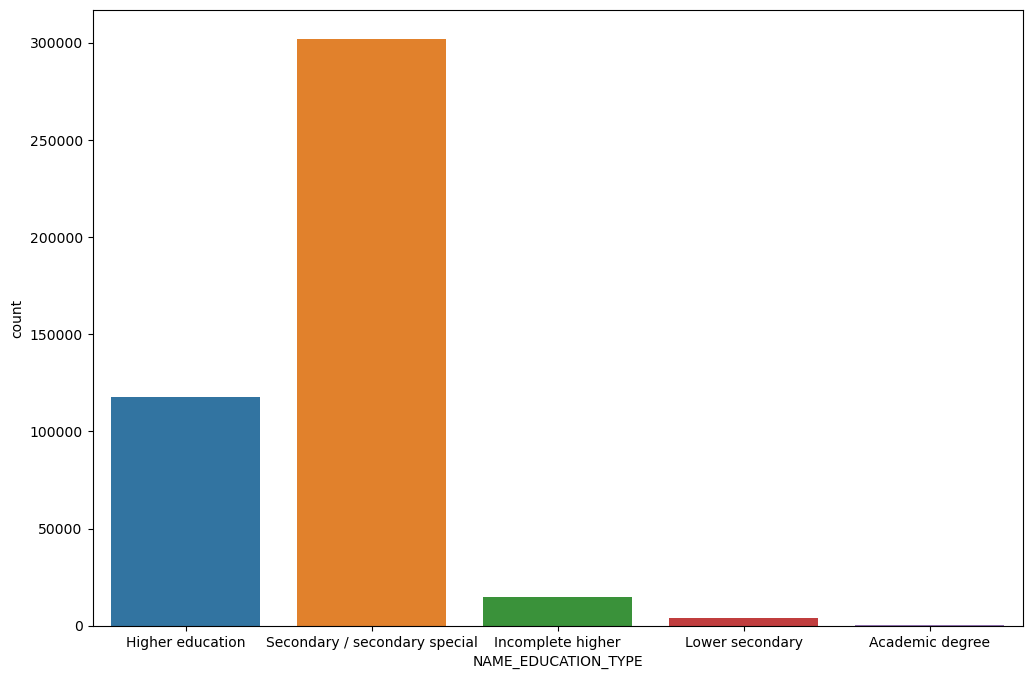

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_record)
plt.show()

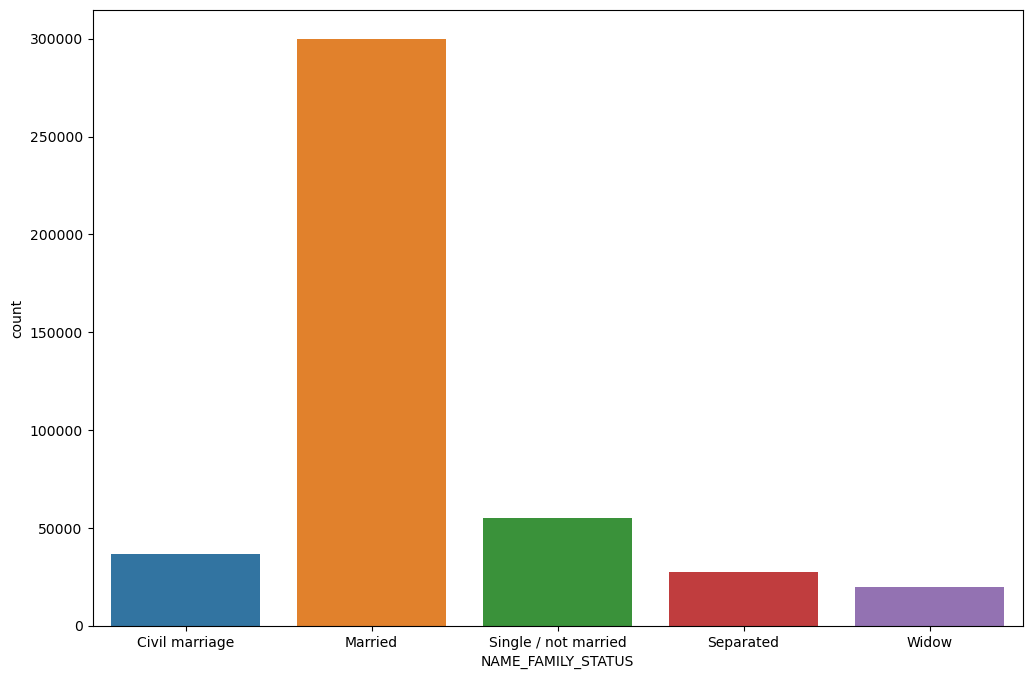

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_FAMILY_STATUS', data=app_record)
plt.show()

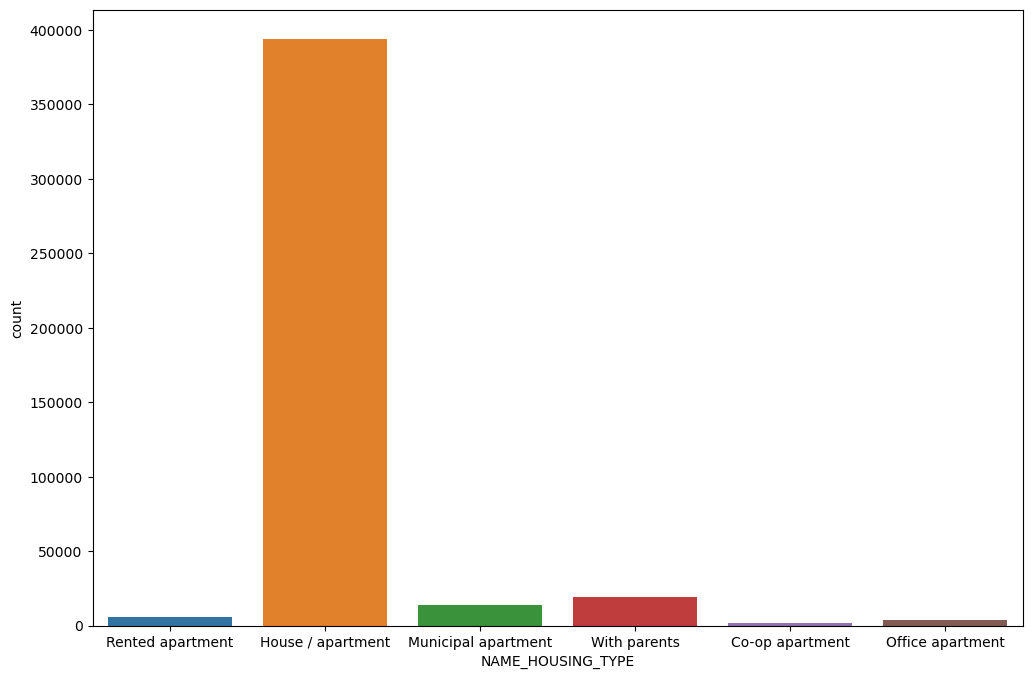

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_HOUSING_TYPE', data=app_record)
plt.show()

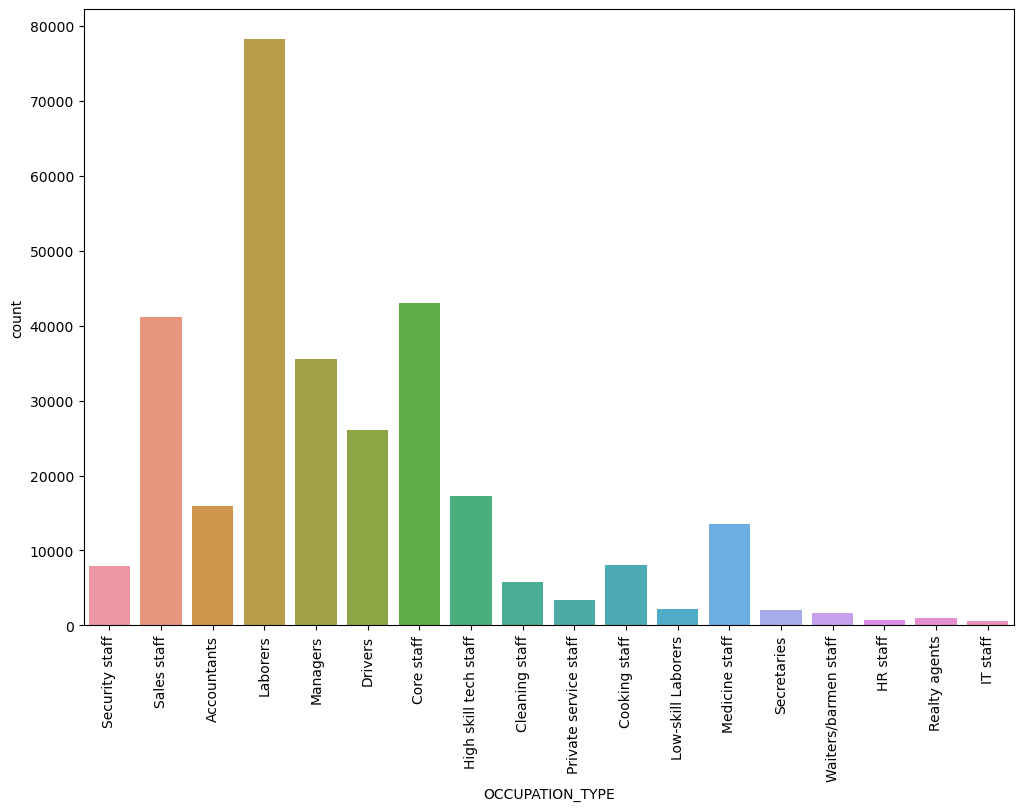

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x='OCCUPATION_TYPE', data=app_record)
plt.xticks(rotation=90)
plt.show()

In [27]:
cred_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


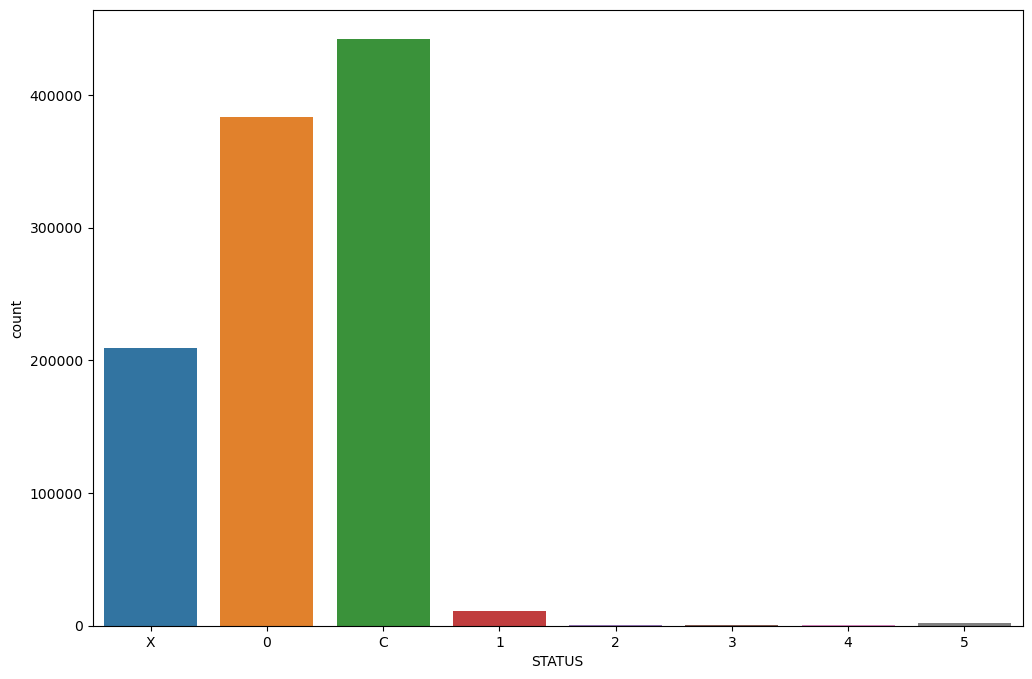

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', data=cred_record)
plt.show()

-> '좋은' 클라이언트와 '나쁜' 클라이언트로 나누면 '좋은' 클라이언트의 비율이 높아서 오버샘플링이 필요해 보인다.

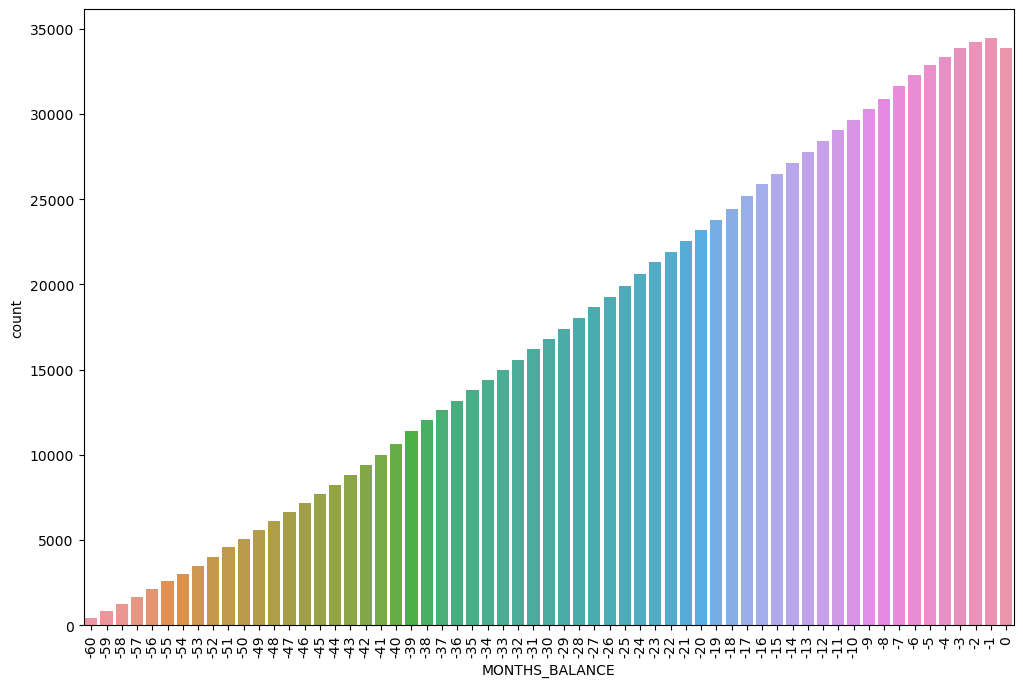

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(x='MONTHS_BALANCE', data=cred_record)
plt.xticks(rotation=90)
plt.show()

-> ID별 가장 max 값으로 사용해야할 것 같다.

### 클라이언트 ID 교집합

In [32]:
print (len(set(app_record['ID']).intersection(set(cred_record['ID']))))

36457
